# <개요>
* **0 목표**
* **1 데이터 소개**
    * 1.1 load data
    * 1.2 y비율 확인
    * 1.3 결측치 확인
    * 1.4 all data (train + test) 생성
* **2 변수별 분석**
    * 2.1 연속형 변수(Numerical values)
    * 2.2 범주형 변수(Categorical values)
* **3 결측치 처리**
    * 3.1 Age
    * 3.2 Cabom
    * 3.3 Embarked
    * 3.4 Fare
* **4 Feature engineering**
    * 4.1 Age
    * 4.2 Family Size
    * 4.3 Cabin
* **5 Modeling**
    * 5.1 Simple modeling
        * 6.1.1 Cross validate models
        * 6.1.2 Hyperparamater tunning for best models
        * 6.1.3 Plot learning curves
        * 6.1.4 Feature importance of the tree based classifiers
    * 5.2 Ensemble modeling
        * 6.2.1 Combining models
    * 5.3 Prediction
        * 6.3.1 Predict and Submit results

# 0. 목표
- 1912년 4월 15일, 타이타닉호는 빙산에 부딪혀 침몰했다. 이 때 승객과 선원은 2224명이었는데 1502명이 죽었다. 즉, 32%만이 살아남았다.
- 우리의 목표는 어떤 사람이 타이타닉호에서 살아남는지 분석하는 것이다. 우리는 특히 머신러닝을 사용해서 생존자를 예측할 것이다.

### Practice Skills
- Binary classification
- Python and R basics

### Metric
- accuracy

### Baseline
- 성별로만 분류한 경우 0.76555

# 1. 데이터 소개

1. train(약900명), test(약400명)로 나뉘어져 있음
2. columns

|Variable|Definition|Key|
|---|---|---|
|**PassengerId**|승객ID||
|**survived**|생존 여부|0 = No, 1 = Yes|
|**Pclass**|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|**Name**|이름|가족 찾을 때 사용|
|**Sex**|성별||
|**Age**|나이||
|**SibSp**|배우자, 형제자매||
|**Parch**|부모, 자식||
|**Ticket**|Ticket number||
|**Fare**|요금||
|**Cabin**|선실 번호||
|**Embarked**|승선 항구|S = Southampton → C = Cherbourg → Q = Queenstown|

**데이터 로드**

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn') # sns.set()도 seaborn style로 바꿔줌
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 명령문 결과 다 보여주기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape, test.shape

((891, 12), (418, 11))

In [7]:
print('<train set 데이터 타입>')
train.dtypes
print('='*30)
print('<test set 데이터 타입>')
test.dtypes

<train set 데이터 타입>


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<test set 데이터 타입>


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

사용할 변수 <br>
   1. 연속형 변수 : Age / SibSp / Parch / Fare
   2. 범주형 변수 : Pclass / Name / Sex / Ticket / Cabin / Embarked

**y 비율 확인**

,y_ratio
0,61.616162
1,38.383838


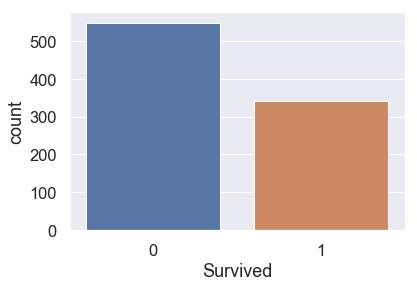

In [6]:
sns.countplot(x = 'Survived', data = train)
(train['Survived'].value_counts(normalize=True)*100).to_frame(name='y_ratio')

실제 타이타닉 사망률, 생존률과 비슷하므로 샘플링이 적절하게 이루어졌다.

**결측치 확인**

In [8]:
train.isna().sum().to_frame(name='train_missing_value')
test.isna().sum().to_frame(name='test_missing_value')

,train_missing_value
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


,test_missing_value
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


Age / Cabin / Embarked / Fare에 결측치가 있다.<br>
각 변수들을 결측치없이 분석한 후 결측치를 처리하겠다.

### all = train + test 
: 사실 이 예측은 이미 다 결과가 나와있는 것을 예측하는 것으로 실제 예측과는 차이가 있을 수 있다. <br>
일반적인 예측은 비슷한 재난의 여러 case를 모아다가 머신러닝 모델을 만들어, 비슷한 재난이 발생했을 때 생존자를 예측하거나 생존률을 늘리는 데에 목표가 있다. <br>
이 땐 test 데이터가 없다. 따라서 train set의 데이터만을 바탕으로 해서 머신러닝 모델을 만들어내지만, 타이타닉의 경우엔 하나의 사건을 train과 test로 나눴기 때문에 EDA할 때 어쩔 수 없이 test를 가져다가 써야하는 경우들이 있다. <br>
같은 티켓을 가진 사람들이 가족 단위인지 확인하고 싶은 경우가 그 예다. 우리는 주어진 티켓을 가진 사람을 전부 알 수 있다. test를 함께 쓰는 경우에만 말이다.<br>
그러나 여기에서는 all을 사용할 수 밖에 없는 경우를 제외하고는 train만을 사용할 것이다. 특히 feature engineering 부분에서는 train만을 이용할 것이다. 그래야 예측에 의미가 있기 때문이다.

In [9]:
all = pd.concat(objs=[train, test], axis=0, sort=False).reset_index(drop=True) 

In [10]:
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
all.shape

(1309, 12)

In [12]:
all.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# 2. 변수별 분석
   1. 연속형 변수 : Age(263) / SibSp / Parch / Fare(1)
   2. 범주형 변수 :Sex / Pclass / Embarked(2) / Name / Ticket / Cabin(1014)
                                                       * ()는 결측치의 수

### 1) 연속형 변수  Age / SibSp / Parch / Fare

**이상값(outlier) 확인 & 처리**

In [13]:
train[['Age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Age와 Fare의 최대값이 3Q(3rd Quantile)보다 심하게 큰 것으로 보아 이상값이 존재할 것으로 예상된다.<br>
SibSp와 Parch는 int라 다른 방식으로 살펴봐야겠다.<br>

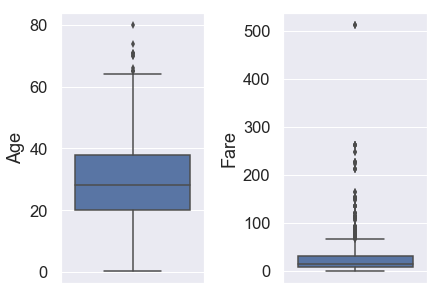

In [14]:
col1 = ['Age','Fare']

fig, axes = plt.subplots(1,2,constrained_layout=True)

for i in range(2):
    sns.boxplot(y=col1[i], data=train, ax=axes[i])

Fare에 눈에 띄는 이상값이 존재한다. 

In [15]:
train[train['Fare']>400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


이상값에 해당하는 데이터 3 rows를 제거하겠다.

In [16]:
# train에서 이상값있는 데이터 제거
outlier_id = train[train['Fare'] > 400].PassengerId.tolist()

train = train[~train['PassengerId'].isin(outlier_id)]
train.shape # 891 - 3 = 888

all = all[~all['PassengerId'].isin(outlier_id)]
all.shape # 1309 - 3 = 1306

(888, 12)

(1306, 12)

In [17]:
train['SibSp'].value_counts().to_frame(name='SibSp')
train['Parch'].value_counts().to_frame(name='Parch')

,SibSp
0,605
1,209
2,28
4,18
3,16
8,7
5,5


,Parch
0,676
1,117
2,80
5,5
3,5
4,4
6,1


두 변수 모두 0,1,2는 데이터가 많은데 3이상인 경우에 데이터가 적은 편이다. 특히 SibSp의 경우는 이상값으로 생각할 수 있는 부분에 꽤 많은 데이터를 포함하고 있어서 뒤쪽에서  EDA한 후 제거할지 말지 결정하겠다. 이제 train 데이터는 888개가 됐다.

▶ 뒤에서 이상값 제거할지 확인해야 하는 변수 : `Parch`, `SibSp`

**변수 사이의 관계**

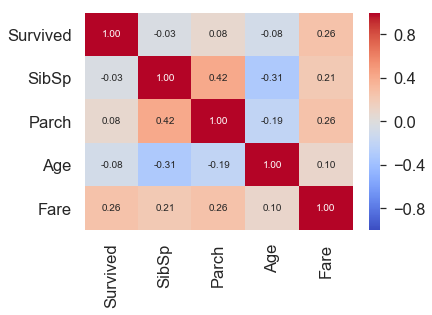

In [18]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
# 연속형 변수와 Survived(y값) 사이의 상관관계 행렬
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",
               vmin=-1, vmax=1)

- Survived와 Fare는 0.26의 양의 상관 관계가 약하게 나타난다. 요금을 비싸게 낼수록 생존할 가능성이 약간 커진다.<br>
  y에 영향을 미칠 가능성이 높은 변수는 Fare이다.
- SibSp와 Parch는 0.42의 양의 상관 관계를 보인다. 
- SibSp와 Age는 -0.31의 음의 상관 관계를 보인다.
- Fare와 SibSp, Parch는 약한 양의 상관 관계를 보인다.

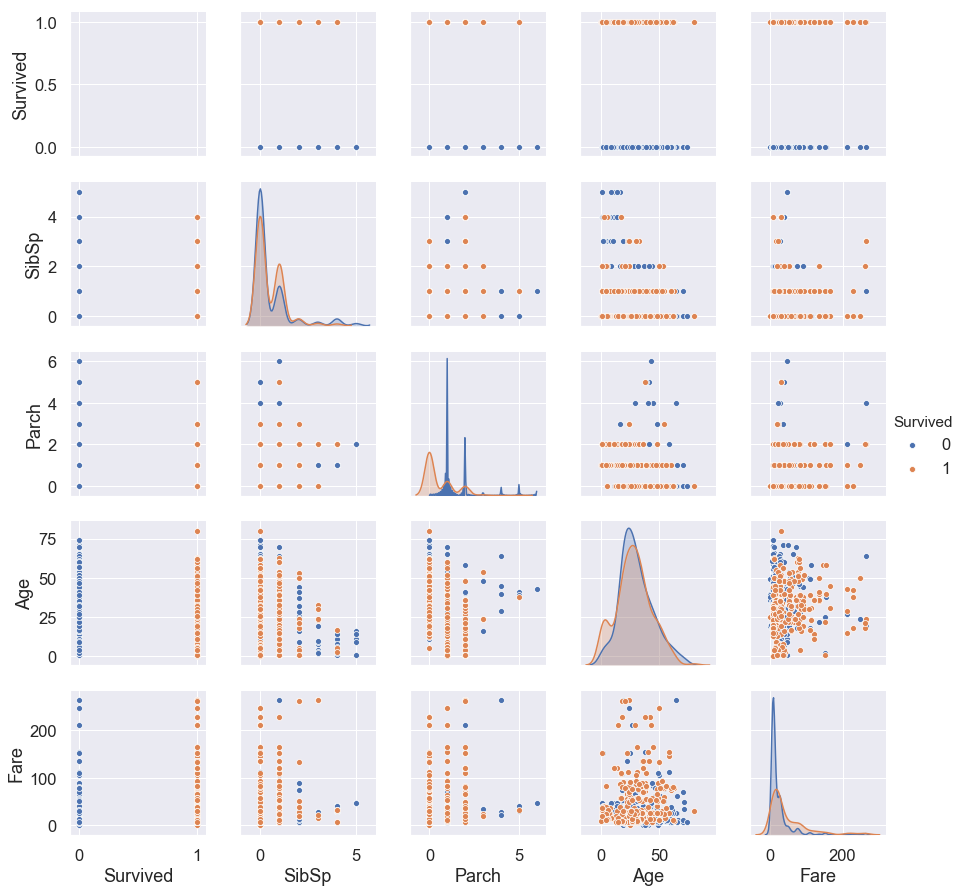

In [19]:
df = train[["Survived","SibSp","Parch","Age","Fare"]].dropna()
g = sns.pairplot(df, hue='Survived', dropna=True)

**1.Age(float64)**

사망과 생존이 전 연령에 대체로 고르게 분포되어 있다. 좀 더 세부적인 분포 모양을 살펴보자.

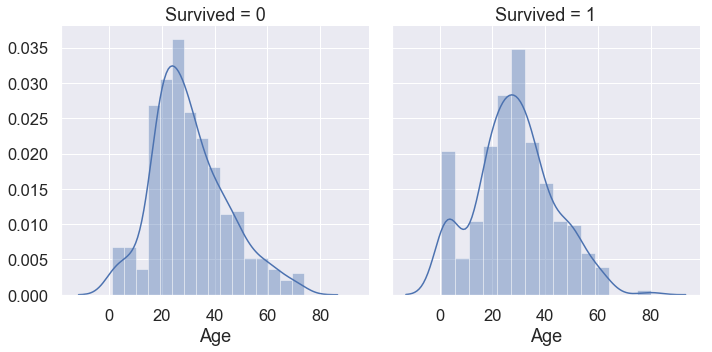

In [20]:
g = sns.FacetGrid(train, col='Survived', size=5)
g = g .map(sns.distplot, "Age")

생존 여부에 따라 나이 분포 모양이 다르게 생겼다.

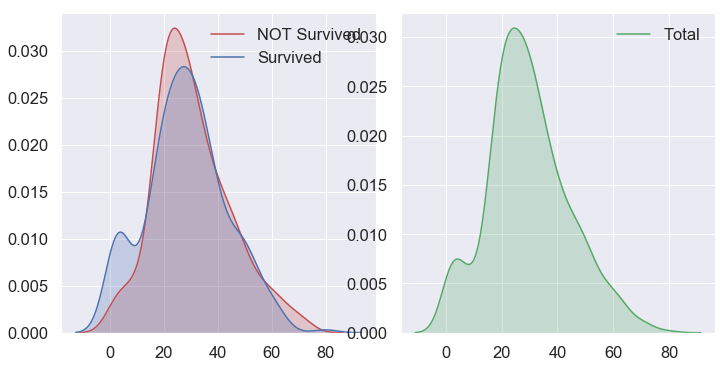

In [21]:
figure, ax= plt.subplots(1,2, figsize=(10,5), constrained_layout=True)
plt.subplot(121)
sns.kdeplot(train[train['Survived'] == 0]['Age'], shade=True, color="r", label = 'NOT Survived')
sns.kdeplot(train[train['Survived'] == 1]['Age'], shade=True, color="b", label = 'Survived')
plt.subplot(122)
ax2=sns.kdeplot(train['Age'], shade=True, color="g", label='Total')

나이가 어린 경우의 생존률(약 15세이하)이 다른 연령에 비해 높다.<br>
각 연령에 따른 생존률을 확인해보자. 

<Figure size 504x504 with 0 Axes>

Text(0.5,1.02,'Survival rate change depending on range of Age')

Text(0,0.5,'Survival rate')

Text(0.5,0,'Range of Age(0~x)')

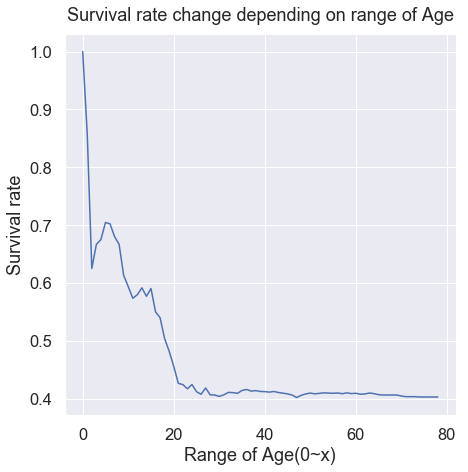

In [22]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

20세 미만의 연령층에서 뚜렷하게 높은 생존률을 보이고 있다. <br>
▶ feature engineering에서 나이 변수를 범주화 할 가능성이 있다.

**2.SibSp**

Text(0.5,1,'train survived_ratio')

Text(0,0.342149,'0.34')

Text(1,0.535885,'0.54')

Text(2,0.464286,'0.46')

Text(3,0.25,'0.25')

Text(4,0.166667,'0.17')

Text(5,0,'0.00')

Text(6,0,'0.00')

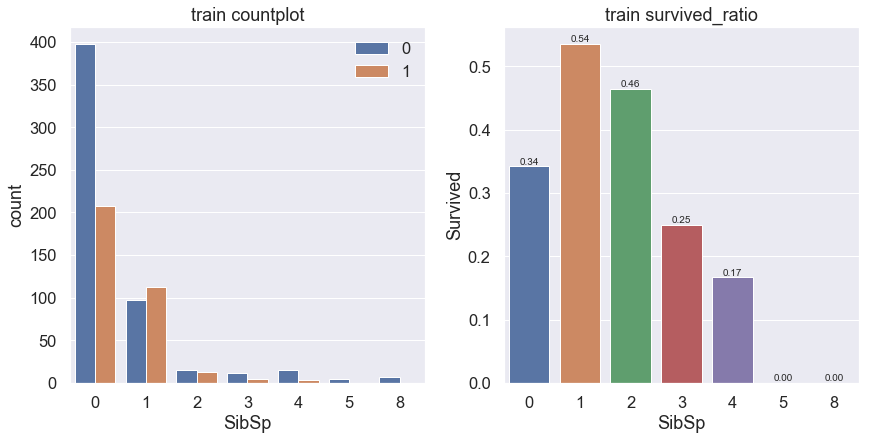

In [24]:
fig, axes = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

ax = sns.countplot(x="SibSp", data=train, hue='Survived', ax=axes[0]).set_title('train countplot')
axes[0].legend(loc='upper right')
ax2 = sns.barplot(x="SibSp", y='Survived', data=train.groupby('SibSp').mean()['Survived'].reset_index(), ax=axes[1])
axes[1].set_title('train survived_ratio')

for p in ax2.patches: # patches : x가 number일 때만 사용 가능
    x=p.get_bbox().get_points()[0,0]
    y=p.get_bbox().get_points()[1,1]
    ax2.annotate('{:.2f}'.format(y), (x+0.4, y), ha='center', va='bottom') # set the alignment of the text

형제자매,배우자가 1명 또는 2명인 경우 생존률이 월등히 높다.(>0.45, 나머지 < 0.35)<br>
▶ Feature Engineering에서 이를 범주화(binning)할 것이다. <br>
그러나 2의 경우는 표본 수가 작아서 유효한 사실로 받아들일 수 있을지 잘 모르겠다. 공부 필요한 부분. <br>

binning을 하면 표본 수가 적절히 분배되기 때문에 표본 작은 부분의 데이터(이상값)는 제거할 필요없음.

**3.Parch**

Text(0.5,1,'train survived_ratio')

Text(0,0.341716,'0.34')

Text(1,0.547009,'0.55')

Text(2,0.5,'0.50')

Text(3,0.6,'0.60')

Text(4,0,'0.00')

Text(5,0.2,'0.20')

Text(6,0,'0.00')

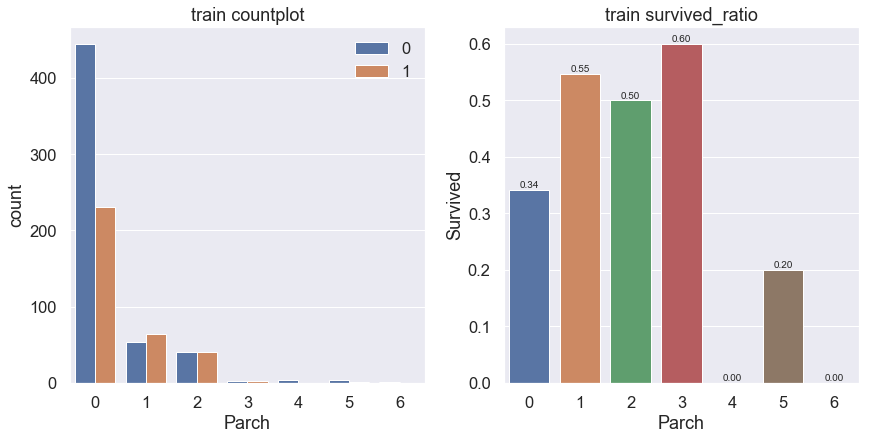

In [23]:
fig, axes = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

ax = sns.countplot(x="Parch", data=train, hue='Survived', ax=axes[0]).set_title('train countplot')
axes[0].legend(loc='upper right')
ax2 = sns.barplot(x="Parch", y='Survived', data=train.groupby('Parch').mean()['Survived'].reset_index(), ax=axes[1])
axes[1].set_title('train survived_ratio')

for p in ax2.patches: # patches : x가 number일 때만 사용 가능
    x=p.get_bbox().get_points()[0,0]
    y=p.get_bbox().get_points()[1,1]
    ax2.annotate('{:.2f}'.format(y), (x+0.4, y), ha='center', va='bottom') # set the alignment of the text

부모자식이 1,2,3명인 경우 다른 경우보다 생존률이 월등히 높다.(>0.5, 나머지<0.35) <br>
▶ 이 역시 Feature Engineering에서 binnig을 할 가능성이 있어보인다. <br>
그러나 3인 경우에 표본 수가 너무 작아서 생존률이 높다는 사실을 유효하게 받아들일 수 있을지 잘 모르겠다.

binning을 하면 표본 수가 적절히 분배되기 때문에 표본 작은 부분의 데이터(이상값)는 제거할 필요없음.

**추가. fam_size**

In [25]:
train['fam_size'] = train['SibSp'] + train['Parch'] + 1 #1은 자기 자신

In [26]:
train['fam_size'].value_counts(sort=False).to_frame()

,fam_size
1,535
2,160
3,102
4,29
5,15
6,22
7,12
8,6
11,7


4부터는 데이터 양이 적다.

Text(0.5,1,'train survived_ratio')

Text(0,0.300935,'0.30')

Text(1,0.55,'0.55')

Text(2,0.578431,'0.58')

Text(3,0.724138,'0.72')

Text(4,0.2,'0.20')

Text(5,0.136364,'0.14')

Text(6,0.333333,'0.33')

Text(7,0,'0.00')

Text(8,0,'0.00')

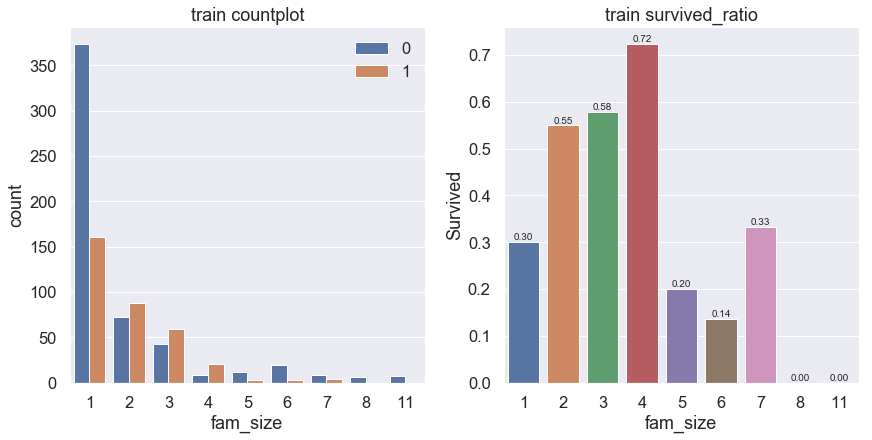

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12,6), constrained_layout = True)

ax = sns.countplot(x="fam_size", data=train, hue='Survived', ax=axes[0]).set_title('train countplot')
axes[0].legend(loc='upper right')
ax2 = sns.barplot(x="fam_size", y='Survived', data=train.groupby('fam_size').mean()['Survived'].reset_index(), ax=axes[1])
axes[1].set_title('train survived_ratio')

for p in ax2.patches: # patches : x가 number일 때만 사용 가능
    x=p.get_bbox().get_points()[0,0]
    y=p.get_bbox().get_points()[1,1]
    ax2.annotate('{:.2f}'.format(y), (x+0.4, y), ha='center', va='bottom') # set the alignment of the text

가족 수가 2, 3, 4인 경우 생존률이 높다.(> 0.5) <br>
▶ 가족 수를 이용해서도 binning해서 feature engineering할 수 있다.<br>
feature engineering에서 fam_size, Parch, SibSp 중 무엇을 feature로 선택할지 생각해야 할 듯<br>

가족 수가 4명인 경우 표본이 너무 적다는 단점이 있다. 이에 대한 처리 방법은 더 공부해야 함. 

**4.Fare**

Text(0.5,1,'The Distribution of Fare')

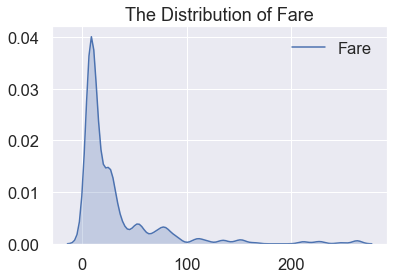

In [28]:
# Fare의 분포
sns.kdeplot(data=train['Fare'], shade = True).set_title('The Distribution of Fare')

이상값을 지웠음에도 불구하고, 분포가 한 쪽으로 치우쳐있다. (right skewed)<br>
그러므로 data transformation이 필요하다. feature engineering에서 할 것. <br>

Text(70,0.03,'here')

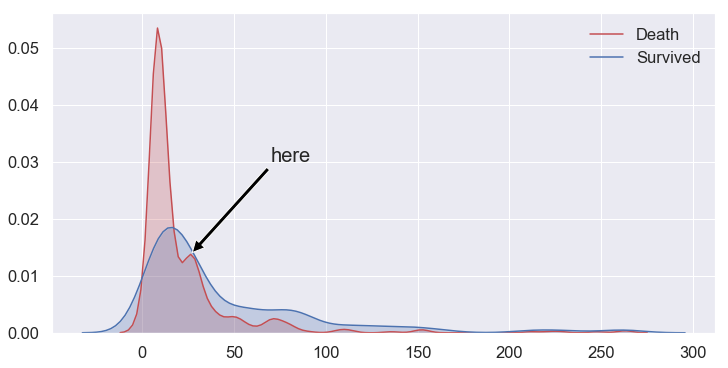

In [29]:
# Survived의 여부에 따른 Fare 분포
fig, ax = plt.subplots(figsize=(10,5), sharey=True, constrained_layout=True)
ax=sns.kdeplot(data=train[train['Survived']==0]['Fare'], shade = True, color='r', label='Death')
ax=sns.kdeplot(data=train[train['Survived']==1]['Fare'], shade = True, color='b', label='Survived')
ax.legend()
ax.annotate('here', xy=(27,0.014), xytext=(70,0.03), arrowprops=dict(facecolor='black', shrink=0.005), fontsize=20)

Fare가 낮은 쪽은 생존률보다 사망률이 높고, Fare가 높은 쪽 (here의 오른편)은 사망률보다 생존률이 높다.

<Figure size 360x360 with 0 Axes>

Text(0.5,1,'Fare : Survived vs Dead')

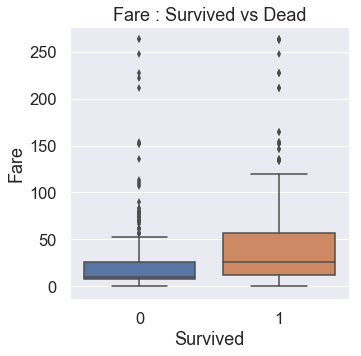

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Fare', data=train, x = 'Survived').set_title('Fare : Survived vs Dead')

생존자의 Fare가 대체로 높은 경향을 보인다.

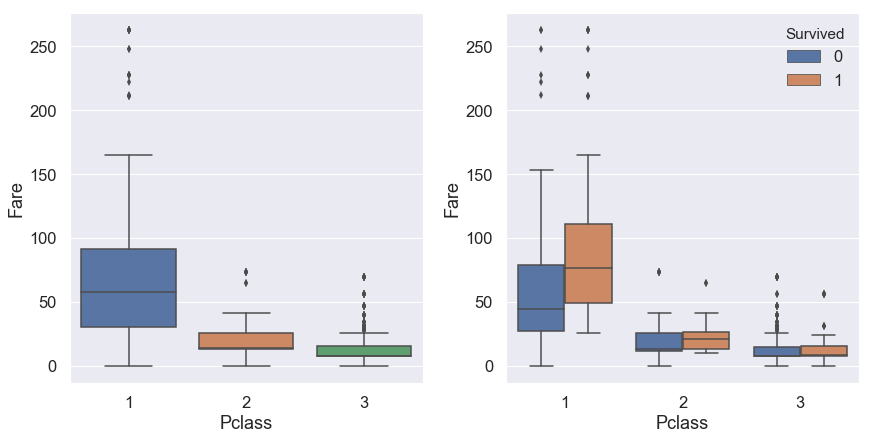

In [31]:
# Pclass별 Fare 분포
fig, g = plt.subplots(1,2, figsize = (12,6),  constrained_layout=True)

sns.boxplot(x='Pclass', y='Fare', data=train, ax=g[0])
sns.boxplot(x='Pclass', y='Fare', data=train, hue='Survived', ax=g[1])

- 첫번째 그래프 : 클래스가 좋을 수록 Fare가 높다.(당연)
- 두번째 그래프 : 신기하게도 클래스가 좋을 수록 생존자의 Fare와 사망자의 Fare에 차이가 커진다. 
                  3rd class는 생존자와 사망자의 Fare의 큰 차이가 없는 반면,
                  2nd class는 중앙값과 분포를 보니 약간의 Fare 차이가 있고,
                  1st class는 꽤 큰 차이를 보인다. 
                  ▶ Pclass*Fare interaction feature를 변수로 사용해도 좋겠다.

In [32]:
train.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,213.0,78.124061,59.996151,0.0,30.6958,57.9792,91.0792,263.00
2,184.0,20.662183,13.417399,0.0,13.0000,14.2500,26.0000,73.50
3,491.0,13.675550,11.778142,0.0,7.7500,8.0500,15.5000,69.55


클래스 별로 mean과 median값을 보면 1 class와 2,3 class의 Fare차이가 매우 크다.<br>
특히 1st class에 이상값으로 여겨지는 수준의 Fare(>200)가 몇 개 있어서 mean에 영향을 많이 주고 있음을 알 수 있다.<br>
그리고 신기하게도 Fare = 0인 승객이 모든 class에 있다. 이 사람들은 뭘까?

In [33]:
train[train['Fare']<2].sort_values(by='Pclass')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,1
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,1
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,1
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,1
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,1
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,1
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,1
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,1
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,1


Fare가 0인 사람들은 모두 가족이 함께 타지 않은 남자이다. 이것이 의미하는 것은 무엇일까? <br>
Fare=0인 경우의 feature를 따로 만들어야하나 잠시 망설였지만 그냥 냅두기로 한다. <br>
왜냐하면 그다지 데이터가 많지 않고, 어차피 우리의 예상은 Fare가 작을 수록 생존률이 낮아지는 것인데 대부분 사망했기 때문에 우리의 예상과 일치하기 때문이다. 그런데 이렇게 예상과 일치한다고 해서 그냥 내버려둬도 되는지는 모르겠다. 하지만 이것이 상식적으로(?) 맞다는 판단 하에 더 깊이 생각하지 않고 진행하기로 한다.

### 2) 범주형 변수  Sex / Pclass / Embarked / Name / Ticket / Cabin

**1. Sex**

Text(0.5,1,'Sex : Countplot')

Text(0.5,1,'Sex : Survived vs Dead')

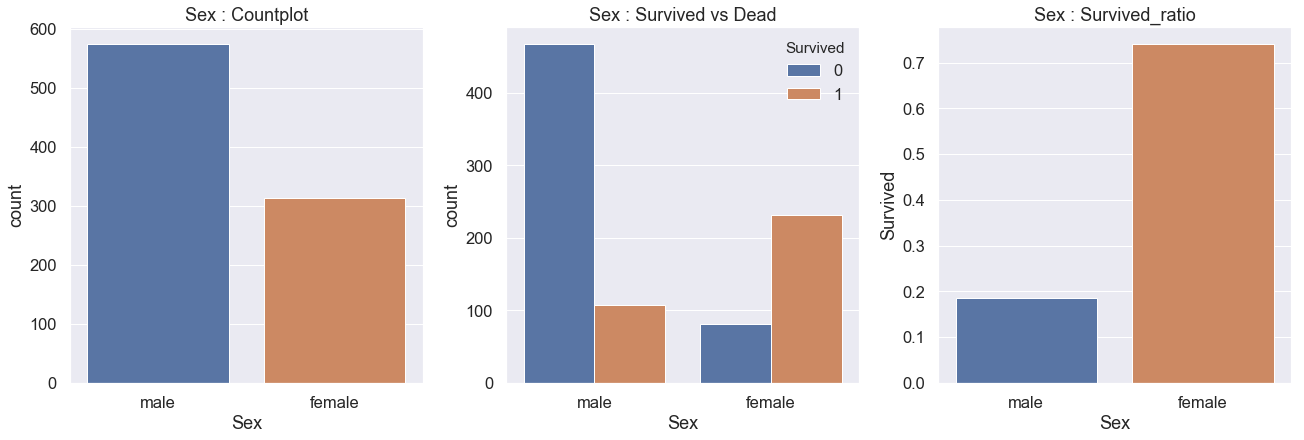

In [34]:
fig, axes = plt.subplots(1,3, figsize=(18,6), constrained_layout=True)

sns.countplot(x='Sex', data=train, ax=axes[0]).set_title('Sex : Countplot')
sns.countplot(x="Sex", data=train, hue='Survived', ax=axes[1]).set_title('Sex : Survived vs Dead')
ax=sns.barplot(x="Sex", y='Survived', data=train.groupby('Sex').mean()['Survived'].reset_index(), 
            ax=axes[2], order=['male','female']).set_title('Sex : Survived_ratio')

In [35]:
(train.groupby('Sex')['PassengerId'].count()/len(train['PassengerId'])*100).to_frame(name = 'ratio')
train.groupby('Sex')['Survived'].sum().to_frame(name='the number of Survived people')

,ratio
Sex,
female,35.247748
male,64.752252


,the number of Survived people
Sex,
female,232
male,107


여성의 생존률은 70%를 넘고 남성의 생존률은 20%도 되지 않는다. Sex는 생존여부를 판단하는 매우 중요한 변수임이 분명하다.

**2. Pclass**

Text(0.5,1,'Pclass : Countplot')

Text(0.5,1,'Pclass : Survived vs Dead')

Text(0.5,1,'Pclass : Survived_ratio')

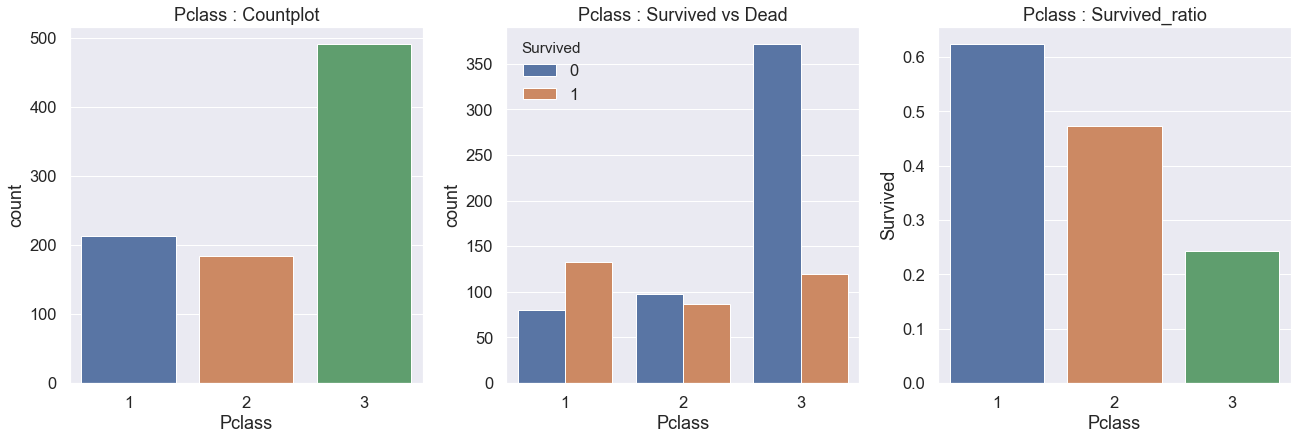

In [36]:
fig, axes = plt.subplots(1,3, figsize=(18,6), constrained_layout=True)

sns.countplot(x='Pclass', data=train, ax=axes[0]).set_title('Pclass : Countplot')
sns.countplot(x="Pclass", data=train, hue='Survived', ax=axes[1]).set_title('Pclass : Survived vs Dead')
sns.barplot(x="Pclass", y='Survived', data=train.groupby('Pclass').mean()['Survived'].reset_index(), 
            ax=axes[2], order=[1,2,3]).set_title('Pclass : Survived_ratio')

- 첫번째 그래프 : class별로 인원 차이가 많이 나는데 3rd class가 독보적으로 많다.
- 두번째 그래프 : 사망자의 대부분이 3rd class이다. class별 생존자 수는 고만고만하다.
- 세번째 그래프 : Pclass에 따라 생존률이 눈에 띄게 차이를 보인다.
- Pclass는 아주 유의미한 변수로 사용할 수 있을 것으로 예상된다.

**3. Embarked**
   
    S → C → Q 순서로 배가 이동했다.

Text(0.5,1,'Embarked : Countplot')

Text(0.5,1,'Embarked : Survived vs Dead')

Text(0.5,1,'Embarked : Survived_ratio')

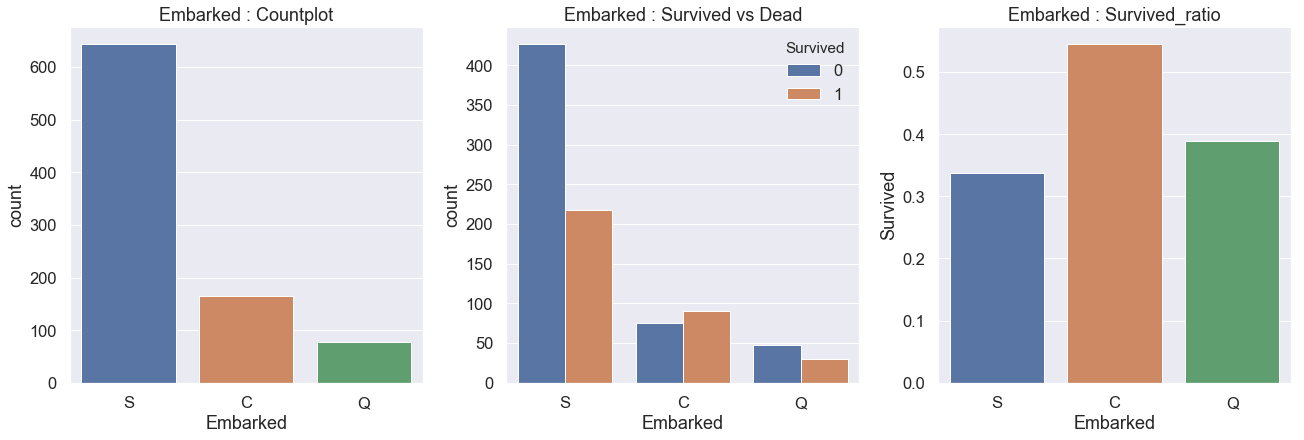

In [37]:
fig, axes = plt.subplots(1,3, figsize=(18,6), constrained_layout=True)

sns.countplot(x='Embarked', data=train, ax=axes[0]).set_title('Embarked : Countplot')
sns.countplot(x="Embarked", data=train, hue='Survived', ax=axes[1]).set_title('Embarked : Survived vs Dead')
sns.barplot(x="Embarked", y='Survived', data=train.groupby('Embarked').mean()['Survived'].reset_index(), 
            ax=axes[2], order=['S','C','Q']).set_title('Embarked : Survived_ratio')

- 첫번째 그래프 : S에서 승선한 사람이 제일 많다. 각 항구별 표본의 수가 눈에 띄게 다르다. 
- 두번째 그래프 : C에서 승선한 사람의 생존률이 높다.
- 세번째 그래프 : 생존률은 C>Q>S 순서다. <br>

        질문 ) 왜 항구마다 생존률이 다른가? 왜 C, Q가 S보다 생존률이 높을까?
               C, Q에서 S보다 high class가 많이 탔나? 'Pclass'와 함께 분포를 확인해보자. 

<Figure size 720x360 with 0 Axes>

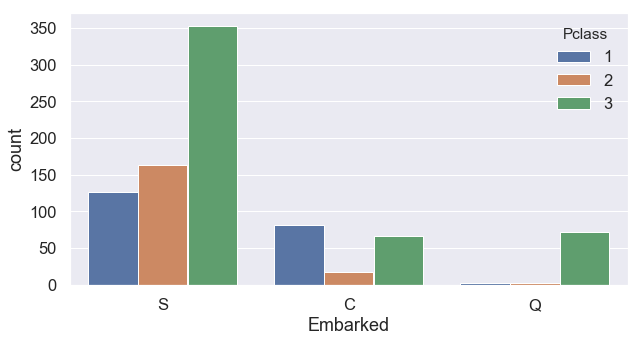

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x="Embarked", data=train, hue='Pclass')

        답 ) C에는 1,2등급의 사람이 3등급보다 많기 때문에 'C'에서 승선한 사람의 생존률이 높다고 생각할 수 있다. 
             그러나 Q는 그렇지 않다.
             오히려 Q는 거의 3등급 사람. 그런데 3등급의 생존률(<0.3) 보다 높은 생존률을 보인다.
             
             따라서 Embarked는 나름의 유효한 변수가 될 수 있다고 예상된다.

**4. Name**

In [39]:
train.sort_values(by='Ticket').head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S,1
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S,1
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S,1
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S,3
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S,3
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S,3
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.00,C110,S,1
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.00,A14,S,1
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.55,C52,S,1
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.25,D37,C,2


Name에서는 유용한 정보가 될만한 것을 찾지 못했다. 따라서 변수로 사용하지 않는다.

**5. Ticket**

- 질문1) Ticket이 같으면 Fare도 같은가?
- 질문2) Ticket이 같으면 Pclass도 같은가? 

먼저 같은 ticket을 가진 사람은 어떤 관계일지 데이터를 살펴보자. 여기에서는 all 데이터를 사용한다. <br>
왜냐하면 전체 데이터를 봐야 그 관계를 확인할 수 있기 때문이다.

In [40]:
# 'fortune' 가족 찾기
all[all['Name'].str.contains("Fortune", case = False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S
944,945,NaN,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,C23 C25 C27,S
960,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0,C23 C25 C27,S


가족이 모두 같은 티켓(19950)을 소지하고 있으며, Fare와 Pclass 모두 같다.

In [41]:
#'PC 17572'인 ticket 소유자
all[all['Ticket'] == 'PC 17572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
52,53,1.0,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
645,646,1.0,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
681,682,1.0,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C


이 경우는 부부와 다른 한 사람으로 구성되어 있는데, 방까지 다른 것으로 보아 하인 또는 지인으로 예상된다. <br>
즉, 같은 티켓을 가져도 꼭 가족일 필요가 없으며 여러 관계가 섞여있다. <br>
그렇다면 하인이든 지인이든 가족이든 상관없이 같은 티켓이면 모두 같은 class와 Fare를 갖는지 확인해보자.

    질문1) ticket이 같으면 Fare도 같은가?
여기에서도 all 데이터를 사용한다.

In [42]:
fare_per_ticket = all.groupby('Ticket')['Fare'].nunique().to_frame()
fare_per_ticket[fare_per_ticket['Fare'] != 1]

,Fare
Ticket,
3701,0
7534,2


3701, 7534 티켓을 제외하고는 모두 Fare가 동일하다. <br>
3701은 결측치이므로 7534만 확인하겠다.

In [43]:
all[all['Ticket'] == '7534'] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
138,139,0.0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S
876,877,0.0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S


Fare가 매우 비슷하므로 같다고 보자.

    답1) Ticket이 같으면 Fare도 같다.

    질문2) Ticket이 같으면 Pclass도 같을까?

In [44]:
pclass_per_ticket = all.groupby('Ticket')['Pclass'].nunique().to_frame()
pclass_per_ticket[pclass_per_ticket['Pclass'] != 1]  

,Pclass
Ticket,


Pclass를 여러 종류로 같는 Ticket은 없다.

    답2) Ticket이 같으면 Pclass도 같다.

티켓을 활용한 여러가지 시도를 통해 몇 가지 사실을 알았을 뿐 티켓에서 변수로 사용될만한 어떤 정보를 찾지는 못했다.

**6. Cabin**

cabin을 1309개의 데이터 중 1014개가 결측치이다.

In [80]:
train['Cabin'].isna().sum()/train.shape[0] *100

77.25225225225225

77.5%가 결측치인 관계로 나는 변수로서 의미가 없다고 판단하여 제거했지만 cabin에 써있는 알파벳을 추출하여 변수로 사용한 사례들이 많이 눈에 띈다. 만약 빅데이터의 상황이라면 비록 22.5%의 데이터만 있다고 하더라도 사용할 것이다. 따라서 시간이 허락한다면 나중에 cabin도 넣어보겠다.

**추가. Pclass, Sex, Age** 

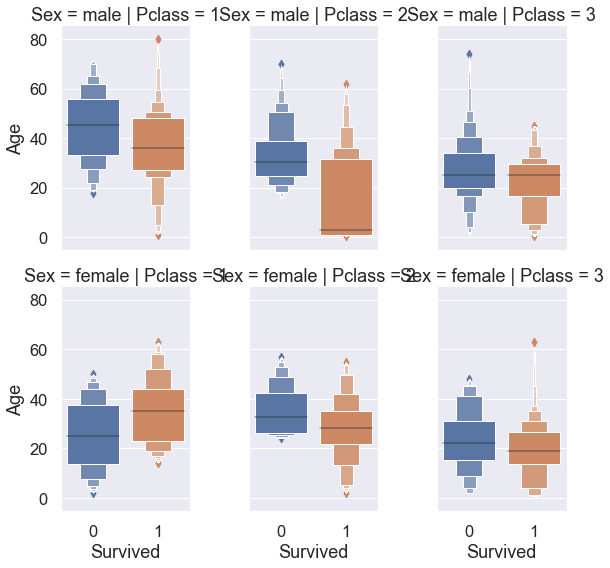

In [46]:
g = sns.catplot(row="Sex", y="Age",col="Pclass",
                data=train, kind="lv", x='Survived',
                height=4, aspect=.7)

Pclass와 Sex에 따라 Age가 달라지는 지점들이 보인다. 특히 1,2 클래스가 그렇다. <br>
- 위쪽 그래프(Male) : 1,2 class에서는 상대적으로 어린 사람들이 더 많이 살아남았다.
- 아래쪽 그래프(Female) : 1 class는 생존자의 나이가 사망자의 나이에 비해 더 많고, 2 class는 생존자의 나이가 사망자보다 더 어리다.

▶ Pclass\*Sex\*Age interaction이 존재한다.

# 정리

1. 연속형 변수
    - Age(263) ▶ Feature Engineering에서 범주화(binning) 가능
    - SibSp ▶ Feature Engineering에서 범주화(binning) 가능
    - Parch ▶ Feature Engineering에서 범주화(binning) 가능
    - Fare(1) ▶ Pclass*Fare interaction feature를 변수로 사용해도 좋겠다.
    - * fam_size ▶ Feature Engineering에서 범주화(binning) 가능

2. 범주형 변수
    - Sex 
    - Pclass 
    - Embarked(2) 
    - Name 
    - Ticket 
    - Cabin(1014) ▶▶ 알파벳 추출해서 deck변수로 사용할 수 있다.
3. ▶ Pclass\*Sex\*Age interaction이 존재

# 3. 결측치 처리 
### 항상 test는 unseen 상태여야 한다. 따라서 train 에서 얻은 statistics 를 기반으로 test 의 null data 를 채워야한다.

In [47]:
print('<train 결측치>')
train.isna().sum()
print('='*20)
print('<test 결측치>')
test.isna().sum()

<train 결측치>


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
fam_size         0
dtype: int64

<test 결측치>


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Age / Cabin / Embarked / Fare

**1. Age**

Pclass, Sexm Embarked에 따른 나이 분포에 차이가 있는지 확인하자.

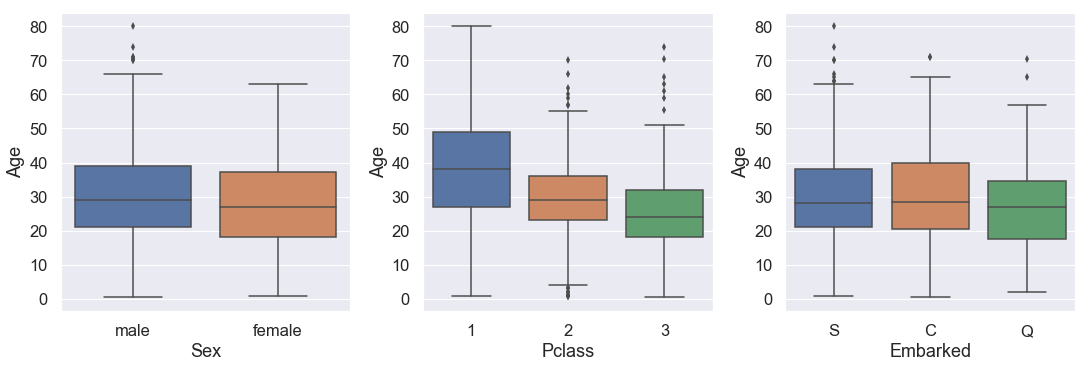

In [48]:
fig, axes = plt.subplots(1,3, figsize =(15,5), constrained_layout = True)
sns.boxplot(x='Sex', y='Age', data=train, ax=axes[0])
sns.boxplot(x='Pclass', y='Age', data=train, ax=axes[1])
sns.boxplot(x='Embarked', y='Age', data=train, ax=axes[2])

나이 분포를 봤을 때 Pclass(가운데 그래프)가 명확히 영향을 주고 있으므로 missing value는 클래스를 기준으로 median값을 대입하겠다.

In [49]:
# fill Age's missing value
train.groupby("Pclass")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,183.0,38.280984,14.919515,0.92,27.0,38.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


train에서의 중앙값으로 missing value를 채웁니다. class 순으로 38, 29, 24입니다.

In [55]:
all.loc[(all['Age'].isna())&(all['Pclass']==1),'Age'] = 38
all.loc[(all['Age'].isna())&(all['Pclass']==2),'Age'] = 29
all.loc[(all['Age'].isna())&(all['Pclass']==3),'Age'] = 24
all['Age'].isna().sum()

0

**2. Cabin**

Cabin은 결측치가 너무 많아서 결측치 자체를 새로운 변수로 생성하겠다. ('U' : Unknown)

In [56]:
# fill Cabin's missing value
all['Cabin'].fillna('U', inplace = True)

**3. Embarked**

Text(0.5,1,'Embarked : Countplot')

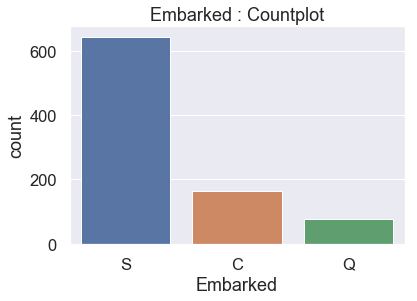

In [57]:
sns.countplot(x='Embarked', data=train).set_title('Embarked : Countplot')

대부분의 승객이 S에서 탑승했으므로, 최빈값으로 채우자.

In [58]:
# fill Embarked's missing value
all['Embarked'].fillna(all['Embarked'].mode()[0], inplace = True)

**4. Fare**

Fare는 결측치는 Pclass에 해당하는 중앙값으로 대체한다.

In [69]:
train.groupby('Pclass')['Fare'].median()
med_fare_per_pclass = train.groupby('Pclass')['Fare'].median().values
med_fare_per_pclass

Pclass
1    57.9792
2    14.2500
3     8.0500
Name: Fare, dtype: float64

array([57.9792, 14.25  ,  8.05  ])

In [71]:
all.loc[(all['Fare'].isna())&(all['Pclass']==1), 'Fare'] = med_fare_per_pclass[0]
all.loc[(all['Fare'].isna())&(all['Pclass']==2), 'Fare'] = med_fare_per_pclass[1]
all.loc[(all['Fare'].isna())&(all['Pclass']==3), 'Fare'] = med_fare_per_pclass[2]
all['Fare'].isna().sum()

0

**결측치 확인 & 데이터 저장**

In [72]:
all.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [73]:
all.shape
train.shape, test.shape

(1306, 12)

((888, 13), (418, 11))

In [74]:
# 데이터 저장
all.to_csv('after_mv_all_final.csv', index=False)